In [16]:
import numpy as np
%matplotlib inline

Import a few stingray libraries.

In [17]:
from stingray.lightcurve import Lightcurve
from stingray.events import EventList

## Light Curve

We can create a light curve through array of time stamps and counts

In [18]:
times = np.arange(1000)
counts = np.random.rand(1000)*100
lc = Lightcurve(times, counts)

In [19]:
len(lc)

1000

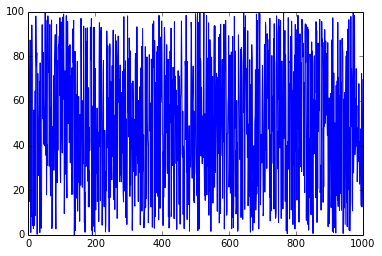

In [20]:
lc.plot()

Alternatively, we can pass on an array of photon arrival times, or otherwise known as event list. Here, we capture the arrival times from a text file.

In [21]:
arrivals = np.loadtxt("Data/photon_arrivals.txt")
lc = Lightcurve.make_lightcurve(arrivals, dt=1)
arrivals

array([  1.,   1.,   2.,   2.,   2.,   3.,   3.,   3.,   3.,   3.,   4.,
         5.,   5.,   5.,   5.,   6.,   7.,   7.,   7.,   8.,   9.,  10.,
        10.,  10.])

In [22]:
lc.counts

array([2, 3, 5, 1, 4, 1, 3, 1, 4])

In [23]:
lc_new = lc.rebin_lightcurve(2)
lc_new.counts

array([ 5.,  6.,  5.,  4.])

A variety of operations such including addition, subtraction, truncation, negation, indexing and sorting are available for these Lightcurve objects. For detailed illustration, see: https://github.com/StingraySoftware/notebooks

## Event Lists

Define photon arrival times.

In [24]:
times = [0.5, 1.5, 2.5, 3.5]

Create event list.

In [25]:
ev = EventList(times)
ev.time

array([ 0.5,  1.5,  2.5,  3.5], dtype=float128)

To create light curve out of event list, define interval, starting time and total duration of light curve

In [26]:
lc = ev.to_lc(dt=1, tstart=0, tseg=4)
lc.counts

array([1, 1, 1, 1])

If instead of arrival times, we have a light curve, we can set times through set_times() method.

In [28]:
ev = EventList(ncounts=1000)
ev.set_times(lc)

## IO operations

Pickle, ascii, hdf5 and fits are supported for IO. Below, we read a sample fits file.

In [31]:
ev = EventList()
ev = ev.read('Data/events.fits', 'fits')

Alternatively, we can used hdf5 to store and later retrieve data.

In [32]:
ev = EventList(time = arrivals)
ev.write('ev.hdf5', 'hdf5')
ev = ev.read('ev.hdf5', 'hdf5')
ev.time

array([ 1.0,  1.0,  2.0,  2.0,  2.0,  3.0,  3.0,  3.0,  3.0,  3.0,  4.0,
        5.0,  5.0,  5.0,  5.0,  6.0,  7.0,  7.0,  7.0,  8.0,  9.0,  10.0,
        10.0,  10.0], dtype=float128)